In [1]:
import polars as pl

In [2]:
# Read individual CSV files
df_jan = pl.read_csv('jan_2016.csv')
df_feb = pl.read_csv('feb_2016.csv')
df_mar = pl.read_csv('mar_2016.csv')

In [3]:
print(df_jan.shape)
print(df_feb.shape)
print(df_mar.shape)

(10695958, 28)
(11163469, 28)
(11984114, 28)


In [4]:
# Concatenate row-wise
df_all = pl.concat([df_jan, df_feb, df_mar], how="vertical")

In [5]:
df_all.head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_unix,dropoff_unix,trip_times,speed,log_trip_times,pickup_cluster,pickup_unix_binned,pickup_binned_datetime,trip_times_capped
i64,str,str,i64,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,str,f64
2,"""2016-01-01 00:…","""2016-01-01 00:…",2,5.52,-73.980118,40.74305,1,"""N""",-73.91349,40.763142,2,19.0,0.5,0.5,0.0,0.0,0.3,20.3,1.4516e9,1.4516e9,18.5,17.902703,4.301163,10,1.4516e9,"""2015-12-31T18:…",18.5
2,"""2016-01-01 00:…","""2016-01-01 00:…",2,7.45,-73.994057,40.71999,1,"""N""",-73.966362,40.789871,2,26.0,0.5,0.5,0.0,0.0,0.3,27.3,1.4516e9,1.4516e9,26.75,16.71028,5.17204,20,1.4516e9,"""2015-12-31T18:…",26.75
1,"""2016-01-01 00:…","""2016-01-01 00:…",1,1.2,-73.979424,40.744614,1,"""N""",-73.992035,40.753944,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3,1.4516e9,1.4516e9,11.9,6.05042,3.449638,10,1.4516e9,"""2015-12-31T18:…",11.9
1,"""2016-01-01 00:…","""2016-01-01 00:…",1,6.0,-73.947151,40.791046,1,"""N""",-73.920769,40.865578,2,18.0,0.5,0.5,0.0,0.0,0.3,19.3,1.4516e9,1.4516e9,11.2,32.142857,3.34664,6,1.4516e9,"""2015-12-31T18:…",11.2
2,"""2016-01-01 00:…","""2016-01-01 00:…",1,3.21,-73.998344,40.723896,1,"""N""",-73.99585,40.6884,2,11.5,0.5,0.5,0.0,0.0,0.3,12.8,1.4516e9,1.4516e9,11.1,17.351351,3.331666,4,1.4516e9,"""2015-12-31T18:…",11.1


In [6]:
df_all.schema

OrderedDict([('VendorID', Int64),
             ('tpep_pickup_datetime', String),
             ('tpep_dropoff_datetime', String),
             ('passenger_count', Int64),
             ('trip_distance', Float64),
             ('pickup_longitude', Float64),
             ('pickup_latitude', Float64),
             ('RatecodeID', Int64),
             ('store_and_fwd_flag', String),
             ('dropoff_longitude', Float64),
             ('dropoff_latitude', Float64),
             ('payment_type', Int64),
             ('fare_amount', Float64),
             ('extra', Float64),
             ('mta_tax', Float64),
             ('tip_amount', Float64),
             ('tolls_amount', Float64),
             ('improvement_surcharge', Float64),
             ('total_amount', Float64),
             ('pickup_unix', Float64),
             ('dropoff_unix', Float64),
             ('trip_times', Float64),
             ('speed', Float64),
             ('log_trip_times', Float64),
             ('pickup_cluste

In [7]:
print(sorted(set(str(item) for item in df_all['pickup_unix_binned']))[:10])

['1451586600.0', '1451587200.0', '1451587800.0', '1451588400.0', '1451589000.0', '1451589600.0', '1451590200.0', '1451590800.0', '1451591400.0', '1451592000.0']


In [8]:
df_all.shape

(33843541, 28)

# Clustering

In [11]:
! pip install gpxpy

  Using cached gpxpy-1.6.2-py3-none-any.whl.metadata (5.9 kB)
Using cached gpxpy-1.6.2-py3-none-any.whl (42 kB)


In [12]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import gpxpy.geo # for haversine distance

# Getting coordinates from Polars DataFrame
coords = df_all.select([
    'pickup_latitude', 'pickup_longitude'
]).to_numpy()

# Will store nice cluster counts for each cluster size
neighbours = []

# Function to compute how many clusters are close to each other (i.e., within 2 miles)
def find_min_distance(cluster_centers, cluster_len):
    less2 = []       # Stores count of close clusters for each center less than 2 Mile
    more2 = []       # Stores count of far clusters for each center greater than 2 Mile
    min_dist = 10000  # Initialize with a large distance (used for tracking minimum)

    for i in range(cluster_len): # For each cluster center
        nice_points = 0  # Clusters with at least one nearby cluster (within 2 miles)
        wrong_points = 0 # Clusters with no nearby clusters
        for j in range(cluster_len): # Compare with every other cluster
            if j == i:
                continue # skip comparing with itself
            
            distance = gpxpy.geo.haversine_distance(
                cluster_centers[i][0], cluster_centers[i][1],
                cluster_centers[j][0], cluster_centers[j][1]
            )
            
            # Convert meters to miles and track minimum inter-cluster distance
            distance_miles = distance / (1.60934 * 1000)
            min_dist = min(min_dist, distance_miles)
            # Count as "nice" if distance is <= 2 Miles
            if distance_miles <= 2:
                nice_points += 1
            else:
                wrong_points += 1
                
        less2.append(nice_points)
        more2.append(wrong_points)
        
    # Store the nice-points data for analysis later
    neighbours.append(less2)
    
    avg_within_2 = np.mean(less2)
    avg_outside_2 = cluster_len - avg_within_2
    
    print('===============================================================================================================')
    print(f"On choosing a cluster size of {cluster_len}")
    print(f"Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): {round(avg_within_2, 2)}\
            {round(100 - (avg_outside_2 * 100 / cluster_len), 2)}%")
    print(f"Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): {round(avg_outside_2, 2)}")
    print(f"Min inter-cluster distance =  {round(min_dist, 3)} Gap {round(min_dist - 0.5 , 2)}")
    
# Function to apply MiniBatchKMeans clustering on pickup coordinates
def find_clusters(increment, dataframe):
    # Initialise and fit MiniBatchKMeans with 'increment' number of clusters
    kmeans = MiniBatchKMeans(
        n_clusters = increment, # Number of clusters to form
        batch_size = 10000,     # Mini-batch size for faster convergence
        random_state = 42,      # For reproducibility
    ).fit(coords)
    
    # Add cluster predictions as a new column to the Polars DataFrame
    dataframe = dataframe.with_columns([
        pl.Series(name = 'pickup_cluster', values = kmeans.predict(coords))
    ])
    
    # Extract the coordinates of cluster centers
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers) # Number of clusters (should be equal to increment)
    
    return cluster_centers, cluster_len

# Loop over different values of K (number of clusters)
for increment in range(10, 100, 10): # for k = 10 -> 100 by 10
    cluster_centers, cluster_len = find_clusters(increment, dataframe = df_all)
    # Evaluate how tightly packed the clusters are (within 2 miles)
    find_min_distance(cluster_centers, cluster_len)

On choosing a cluster size of 10
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 1.8            18.0%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 8.2
Min inter-cluster distance =  0.842 Gap 0.34
On choosing a cluster size of 20
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.2            21.0%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 15.8
Min inter-cluster distance =  0.632 Gap 0.13
On choosing a cluster size of 30
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.07            26.89%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 21.93
Min inter-cluster distance =  0.447 Gap -0.05
On choosing a cluster size of 40
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 10.2            25.5%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 29

In [13]:
# Loop over different values of K (number of clusters)
for increment in range(30, 41): # for k = 20 -> 31 by 2
    cluster_centers, cluster_len = find_clusters(increment, dataframe = df_all)
    # Evaluate how tightly packed the clusters are (within 2 miles)
    find_min_distance(cluster_centers, cluster_len)

On choosing a cluster size of 30
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.07            26.89%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 21.93
Min inter-cluster distance =  0.447 Gap -0.05
On choosing a cluster size of 31
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.65            27.89%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 22.35
Min inter-cluster distance =  0.42 Gap -0.08
On choosing a cluster size of 32
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.38            26.17%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 23.62
Min inter-cluster distance =  0.423 Gap -0.08
On choosing a cluster size of 33
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.3            25.16%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance 

In [15]:
cluster_centers, cluster_len = find_clusters(38, dataframe = df_all)
# Evaluate how tightly packed the clusters are (within 2 miles)
find_min_distance(cluster_centers, cluster_len)

On choosing a cluster size of 38
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 10.63            27.98%
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 27.37
Min inter-cluster distance =  0.36 Gap -0.14


In [16]:
import pandas as pd
import polars as pl
from sklearn.cluster import MiniBatchKMeans

# Step 1: Cluster with k=38
k = 38

# Make sure `coords` is a NumPy array of shape (n_samples, 2) with lat and lon
# Example: coords = df_all.select(['pickup_latitude', 'pickup_longitude']).to_numpy()
coords = df_all.select(['pickup_latitude', 'pickup_longitude']).to_numpy()

# Fit MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=1_000_000, random_state=42).fit(coords)

# Step 2: Extract cluster centers (lat, lon)
cluster_centers = kmeans.cluster_centers_

# Step 3: Create pandas DataFrame from cluster centers
centers_df = pd.DataFrame(cluster_centers, columns=["cluster_lat", "cluster_lon"])
centers_df["pickup_cluster"] = centers_df.index  # cluster id: 0 to 37

# Step 4: Convert to Polars
cluster_centers_pl = pl.from_pandas(centers_df)

# Step 5: Join to your main Polars DataFrame (df_all)
df_all = df_all.join(
    cluster_centers_pl,
    on="pickup_cluster",
    how="left"
)

# (Optional) Step 6: Preview the result
df_all.head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_unix,dropoff_unix,trip_times,speed,log_trip_times,pickup_cluster,pickup_unix_binned,pickup_binned_datetime,trip_times_capped,cluster_lat,cluster_lon
i64,str,str,i64,f64,f64,f64,i64,str,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,str,f64,f64,f64
2,"""2016-01-01 00:…","""2016-01-01 00:…",2,5.52,-73.980118,40.74305,1,"""N""",-73.91349,40.763142,2,19.0,0.5,0.5,0.0,0.0,0.3,20.3,1.4516e9,1.4516e9,18.5,17.902703,4.301163,10,1.4516e9,"""2015-12-31T18:…",18.5,40.755928,-73.97868
2,"""2016-01-01 00:…","""2016-01-01 00:…",2,7.45,-73.994057,40.71999,1,"""N""",-73.966362,40.789871,2,26.0,0.5,0.5,0.0,0.0,0.3,27.3,1.4516e9,1.4516e9,26.75,16.71028,5.17204,20,1.4516e9,"""2015-12-31T18:…",26.75,40.780297,-73.980035
1,"""2016-01-01 00:…","""2016-01-01 00:…",1,1.2,-73.979424,40.744614,1,"""N""",-73.992035,40.753944,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3,1.4516e9,1.4516e9,11.9,6.05042,3.449638,10,1.4516e9,"""2015-12-31T18:…",11.9,40.755928,-73.97868
1,"""2016-01-01 00:…","""2016-01-01 00:…",1,6.0,-73.947151,40.791046,1,"""N""",-73.920769,40.865578,2,18.0,0.5,0.5,0.0,0.0,0.3,19.3,1.4516e9,1.4516e9,11.2,32.142857,3.34664,6,1.4516e9,"""2015-12-31T18:…",11.2,40.678407,-73.950991
2,"""2016-01-01 00:…","""2016-01-01 00:…",1,3.21,-73.998344,40.723896,1,"""N""",-73.99585,40.6884,2,11.5,0.5,0.5,0.0,0.0,0.3,12.8,1.4516e9,1.4516e9,11.1,17.351351,3.331666,4,1.4516e9,"""2015-12-31T18:…",11.1,40.723203,-73.996984


/var/folders/xt/dsl_68w51jzftxq18_hpfkhm0000gn/T/ipykernel_16115/2409309444.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', k)


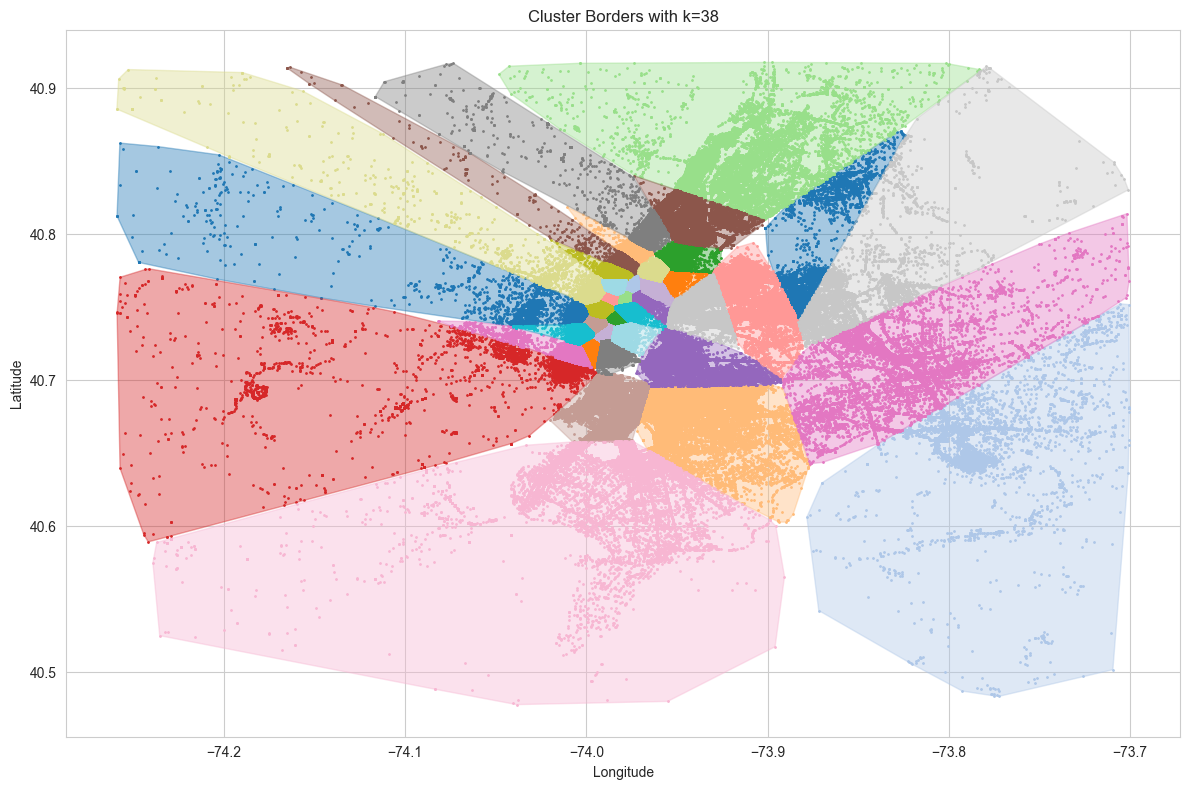

In [17]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import matplotlib.cm as cm

labels = kmeans.labels_

# Create color map
colors = cm.get_cmap('tab20', k)

# Plot
plt.figure(figsize = (12, 8))

for i in range(k):
    cluster_points = coords[labels == i]
    
    # Only draw convex hulls if enough points
    if len(cluster_points) >= 3:
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        plt.fill(hull_points[:, 1], hull_points[:, 0], alpha = 0.4, color = colors(i))

    # Scatter the points too
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], s = 1, color = colors(i))
    
month_jan_2016_modified = df_all.with_columns([
    pl.Series('pickup_cluster', labels)
])
    
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Cluster Borders with k={k}")
plt.grid(True)
plt.tight_layout()
plt.show()

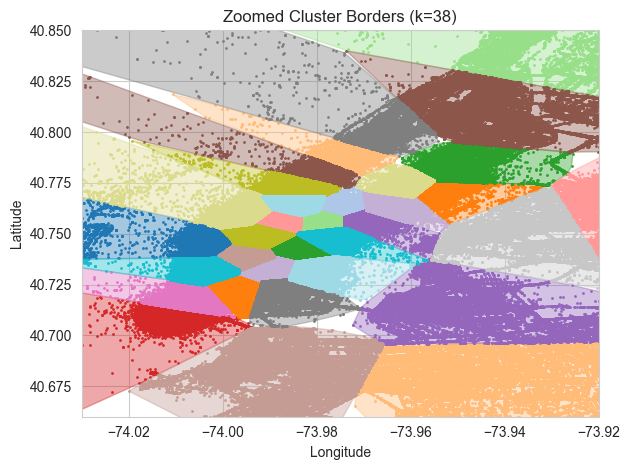

In [18]:
for i in range(k):
    cluster_points = coords[labels == i]

    # Only draw convex hulls if enough points
    if len(cluster_points) >= 3:
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        plt.fill(hull_points[:, 1], hull_points[:, 0], alpha=0.4, color=colors(i))

    # Plot points
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], s=1, color=colors(i))

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Zoomed Cluster Borders (k={k})")

# 🔍 Zoom into dense Manhattan region (adjust values based on your data)
plt.xlim(-74.03, -73.92)   # Longitude
plt.ylim(40.66, 40.85)     # Latitude

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
[str(item) for item in df_all['pickup_unix'][10015:10025]]

In [20]:
cluster_bin_freq = (
    df_all
    .select(['pickup_cluster', 'pickup_unix_binned'])
    .unique()
    .group_by('pickup_cluster')
    .agg([
        pl.count().alias('nums_10min_intervals')
    ])
)

total = 0
for row in cluster_bin_freq.iter_rows():
    cluster_id, num_bins = row
    print(f"For cluster {cluster_id}, there are {num_bins} bins.")
    total += num_bins

print(f"\nTotal number of 10-minute bins across all clusters: {total}")

For cluster 2, there are 12986 bins.
For cluster 6, there are 13028 bins.
For cluster 23, there are 13023 bins.
For cluster 20, there are 13024 bins.
For cluster 15, there are 12997 bins.
For cluster 1, there are 12870 bins.
For cluster 0, there are 13029 bins.
For cluster 13, there are 12983 bins.
For cluster 17, there are 12836 bins.
For cluster 5, there are 13022 bins.
For cluster 8, there are 12911 bins.
For cluster 11, there are 13026 bins.
For cluster 22, there are 13006 bins.
For cluster 16, there are 13021 bins.
For cluster 10, there are 13034 bins.
For cluster 3, there are 12984 bins.
For cluster 19, there are 12990 bins.
For cluster 9, there are 13020 bins.
For cluster 18, there are 13017 bins.
For cluster 4, there are 12988 bins.
For cluster 21, there are 13016 bins.
For cluster 7, there are 13025 bins.
For cluster 24, there are 12399 bins.
For cluster 14, there are 13027 bins.
For cluster 12, there are 12997 bins.

Total number of 10-minute bins across all clusters: 324259


/var/folders/xt/dsl_68w51jzftxq18_hpfkhm0000gn/T/ipykernel_16115/152804236.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias('nums_10min_intervals')


In [21]:
# Calculate lower and upper thresholds for "trip_times" (e.g., 1st and 99th percentile)
lower_threshold = df_all.select(
    pl.col("trip_times").quantile(0.01).alias("lower_threshold")
).to_series()[0]

upper_threshold = df_all.select(
    pl.col("trip_times").quantile(0.99).alias("upper_threshold")
).to_series()[0]

print("Lower threshold:", lower_threshold)
print("Upper threshold:", upper_threshold)

# Cap the outliers in "trip_times" by winsorizing, and store the result in a new column "trip_times_capped"
df_all = df_all.with_columns(
    pl.when(pl.col("trip_times") < lower_threshold)
      .then(lower_threshold)
      .when(pl.col("trip_times") > upper_threshold)
      .then(upper_threshold)
      .otherwise(pl.col("trip_times"))
      .alias("trip_times_capped")
)

# Optional: Display a few rows to verify the changes
print(df_all.select(["trip_times", "trip_times_capped"]).head())

Lower threshold: 1.5166666666666666
Upper threshold: 53.15
shape: (5, 2)
┌────────────┬───────────────────┐
│ trip_times ┆ trip_times_capped │
│ ---        ┆ ---               │
│ f64        ┆ f64               │
╞════════════╪═══════════════════╡
│ 18.5       ┆ 18.5              │
│ 26.75      ┆ 26.75             │
│ 11.9       ┆ 11.9              │
│ 11.2       ┆ 11.2              │
│ 11.1       ┆ 11.1              │
└────────────┴───────────────────┘


In [23]:
pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


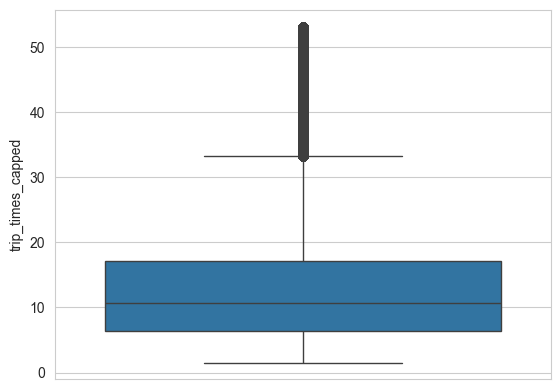

In [25]:
# Calculate the percentiles to remove outliers, and check with BoxPlots
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Polars DataFrame to Pandas for plotting
sns.boxplot(data = df_all.to_pandas(), y = "trip_times_capped")
plt.show()

In [26]:
df_all.schema

OrderedDict([('VendorID', Int64),
             ('tpep_pickup_datetime', String),
             ('tpep_dropoff_datetime', String),
             ('passenger_count', Int64),
             ('trip_distance', Float64),
             ('pickup_longitude', Float64),
             ('pickup_latitude', Float64),
             ('RatecodeID', Int64),
             ('store_and_fwd_flag', String),
             ('dropoff_longitude', Float64),
             ('dropoff_latitude', Float64),
             ('payment_type', Int64),
             ('fare_amount', Float64),
             ('extra', Float64),
             ('mta_tax', Float64),
             ('tip_amount', Float64),
             ('tolls_amount', Float64),
             ('improvement_surcharge', Float64),
             ('total_amount', Float64),
             ('pickup_unix', Float64),
             ('dropoff_unix', Float64),
             ('trip_times', Float64),
             ('speed', Float64),
             ('log_trip_times', Float64),
             ('pickup_cluste

# Data Preparation

In [ ]:
required_cols = [
    'pickup_unix_binned',
    'pickup_cluster',
    'fare_amount',
    'total_amount',
    'pickup_unix',
    'tpep_pickup_datetime',
    'speed',
    'trip_times',
    'trip_distance'
]

In [ ]:
df_all.select(required_cols)
df_sorted = df_all.sort('pickup_unix')

In [ ]:
df_all.schema

In [ ]:
import pandas as pd
from datetime import datetime

# All Features and Target

*feature1* = number of pickup at t - 1 time  
*feature2* = number of pickup at t - 2 time  
*feature3* = number of pickup at t - 3 time  
*feature4* = number of pickup at t - 4 time  
*feature5* = number of pickup at t - 5 time  
  
*feature6*= latitude of cluster  
*feature7* = longitude of cluster  
*feature8* = clusterID  
  
*feature9* = weekday  
*feature10* = exp_avg  

In [27]:
df_all[].unique()

SyntaxError: invalid syntax (2245586014.py, line 1)

# Feature Selection

In [28]:
import pandas as pd

# ——— 0. Make sure df_all is a Polars DataFrame ———
if isinstance(df_all, pd.DataFrame):
    df_all = pl.from_pandas(df_all)
elif not isinstance(df_all, pl.DataFrame):
    df_all = pl.DataFrame(df_all)

# ——— 1. Parse your binned‐datetime into a true Datetime ———
df_all = df_all.with_columns(
    pl.col("pickup_binned_datetime")
      .str.replace('"', "")
      .str.to_datetime("%Y-%m-%dT%H:%M:%S.%3f")
      .alias("pickup_dt")
)

# ——— 2. Aggregate to one row per (cluster, time) ———
df_counts = (
    df_all
    .groupby(["pickup_cluster", "pickup_dt"])
    .agg([
        pl.count().alias("target"),
        pl.first("cluster_lat").alias("lat"),
        pl.first("cluster_lon").alias("lon"),
    ])
    .sort(["pickup_cluster", "pickup_dt"])
)

# ——— 3. Compute lags, weekday, exp‐avg, cluster_id **and time_str** ———
df_features = df_counts.with_columns([
    # lags
    pl.col("target").shift(1).over("pickup_cluster").alias("ft_1"),
    pl.col("target").shift(2).over("pickup_cluster").alias("ft_2"),
    pl.col("target").shift(3).over("pickup_cluster").alias("ft_3"),
    pl.col("target").shift(4).over("pickup_cluster").alias("ft_4"),
    pl.col("target").shift(5).over("pickup_cluster").alias("ft_5"),

    # cluster ID
    pl.col("pickup_cluster").alias("cluster_id"),

    # weekday
    pl.col("pickup_dt").dt.weekday().alias("weekday"),

    # exponential moving average
    pl.col("target")
      .ewm_mean(alpha=0.3)
      .over("pickup_cluster")
      .alias("exp_avg"),

    # **new**: 10-min time bin as "HH:MM"
    pl.col("pickup_dt")
      .dt.truncate("10m")               # round DOWN to nearest 10m
      .dt.strftime("%H:%M")
      .alias("time_str"),
]).drop_nulls()

# ——— 4. Select + reorder final columns (including time_str) ———
df_final = df_features.select([
    "time_str",
    "ft_5","ft_4","ft_3","ft_2","ft_1",
    "lat","lon",
    "weekday","exp_avg",
    "cluster_id","target"
])

df_final.head()

/var/folders/xt/dsl_68w51jzftxq18_hpfkhm0000gn/T/ipykernel_16115/3805605608.py:20: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(["pickup_cluster", "pickup_dt"])
/var/folders/xt/dsl_68w51jzftxq18_hpfkhm0000gn/T/ipykernel_16115/3805605608.py:22: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("target"),
/var/folders/xt/dsl_68w51jzftxq18_hpfkhm0000gn/T/ipykernel_16115/3805605608.py:46: DeprecationWarning: The default value for `ignore_nulls` for `ewm` methods will change from True to False in the next breaking release. Explicitly set `ignore_nulls=True` to keep the existing behavior and silence this warning.
  .ewm_mean(alpha=0.3)


time_str,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,exp_avg,cluster_id,target
str,u32,u32,u32,u32,u32,f64,f64,i8,f64,i64,u32
"""19:20""",142,250,279,294,318,40.744239,-74.003927,4,293.504945,0,317
"""19:30""",250,279,294,318,317,40.744239,-74.003927,4,288.436013,0,278
"""19:40""",279,294,318,317,278,40.744239,-74.003927,4,275.24476,0,247
"""19:50""",294,318,317,278,247,40.744239,-74.003927,4,266.727635,0,248
"""20:00""",318,317,278,247,248,40.744239,-74.003927,4,263.724514,0,257


In [29]:
train = df_final.head(int(df_final.shape[0] * 70 / 100) + 1)
print(train.shape)

(226894, 12)


In [30]:
test = df_final.tail(int(df_final.shape[0] * 30 / 100))
print(test.shape)

(97240, 12)


In [31]:
train.write_csv("train.csv")
test.write_csv("test.csv")
print('Exported.....')

Exported.....
